In [ ]:
def insertInSortedArray(array,element):
  if(len(array)==0):
    array.append(element)
    return
  else:
    for i in range(0,len(array)):
      if(array[i]>element):
        array.insert(i,element)
        return
    array.append(element)
def insertionSort(array):
  output=[]
  for i in array:
    insertInSortedArray(output,i)
  return output

In [ ]:
def getMedian(array):
  l=len(array)
  if(l%2==0):
    return (array[l/2]+array[l/2+1])/2
  else:
    return array[l//2]

def applyKernel(img,kernel):
  array=[]
  for i in range(3):
    for j in range(3):
      array+=[img[i][j]]*kernel[i][j]
  sorted=insertionSort(array)
  median=getMedian(sorted)
  return median

In [ ]:
def applyMedianKernel(img,kernel):
  newImg=[]
  for i in range(1,len(img)-1):
    row=[]
    for j in range(1,len(img[0])-1):
      _3x3=[]
      for a in range(-1,2):
        row_3x3=[]
        for b in range(-1,2):
          row_3x3.append(img[i+a][j+b])
        _3x3.append(row_3x3)
      
      current=applyKernel(_3x3,kernel)
      row.append(current)
    newImg.append(row)
  return newImg

In [ ]:
import numpy as np
from PIL import Image
img=np.asarray(Image.open('BarCode2.jpg').convert("L"))
regularMedian = applyMedianKernel(img,[[1,1,1],[1,1,1],[1,1,1]])
print(len(regularMedian),len(regularMedian[0]))
weightedMedian = applyMedianKernel(img,[[1,3,1],[3,5,3],[1,3,1]])

46 127


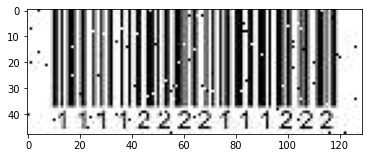

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img, cmap="gray")

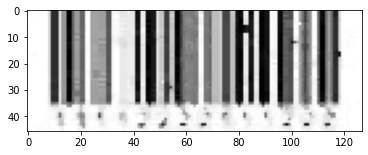

In [ ]:
plt.imshow(regularMedian, cmap="gray")
# Convert the pixels into an array using numpy
array = np.array(regularMedian, dtype=np.uint8)
# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save("regularMedian.jpg")

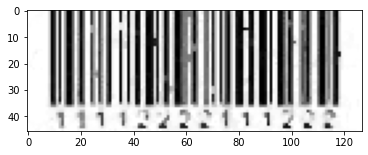

In [ ]:
plt.imshow(weightedMedian, cmap="gray")
# Convert the pixels into an array using numpy
array = np.array(regularMedian, dtype=np.uint8)
# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save('weightedMedian.jpg')

The filtered image using the weighted meadian is better than the regular one because in the weighted median the central pixels has more weight than outer pixels which will reduce the affect of blurring.